# Operador de simetría de rotación $\hat{P}_{C_n}$ actuando sobre una función f(x, y)
<div align="right">David A. Miranda, PhD<br>2021</div>

De a cuerdo con la convención de Wigner, cuando un operador de simetría $\hat{P}_{R}$, asociado a una cierta operación de simetría $R$, actuá sobre una función $f(x,y,z)=f(\vec{r})$, se obtiene:

$$\hat{P}_{R}f(\vec{r}) = f(R^{-1}\vec{r}) \qquad (1)$$

Donde $R^{-1}$ es la operación de simetría inversa a $R$.  Es decir, el efecto del operador de simetría sobre la una función consiste en modificar sus coordenadas $\vec{r}$ según la ecuación (1).

Nóte que $\hat{P}_{SR} = \hat{P}_{S}\hat{P}_{R}$.  Esto se puede ver explícitamente al hacer actuar los operadores de simetría sobre una cierta función:

$\hat{P}_{R}f(\vec{r}) = f(R^{-1}\vec{r}) = g(\vec{r})$

$\hat{P}_{S}g(\vec{r}) = g(S^{-1}\vec{r})$

Como $g(\vec{r}) = f(R^{-1}\vec{r})$ entonces, $g(S^{-1}\vec{r}) = f(R^{-1}S^{-1}\vec{r})$

Pero $R^{-1}S^{-1} = (SR)^{-1}$, con lo cual,

$\hat{P}_{S}\hat{P}_{R}f(\vec{r})=\hat{P}_{s}g(\vec{r})=f[(SR)^{-1}\vec{r})]=\hat{P}_{SR}f(\vec{r})$

# 1. Módulos Python

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# 2. Definiciones y métodos auxiliares

In [2]:
def f(x, y):
    return x ** 2

In [3]:
def ψ_py(x, y, Z=1, a0=1, y0=3/np.sqrt(3)):
    r = np.sqrt( x**2 + (y + y0)**2 )
    ρ = Z * r / a0
    cte = np.sqrt( 1 / ( 64*np.pi )) * (Z / a0)**(3/2)
    return cte * ρ * np.exp(-ρ/2) * (y + y0) / r

In [4]:
def C(r, n):
    θ = - 2*np.pi/n
    x, y = r
    x2 = x*np.cos(θ) - y*np.sin(θ)
    y2 = x*np.sin(θ) + y*np.cos(θ)
    return [x2, y2]

In [5]:
def plot(r, R=[None, None], title='', fun=f, elevation=30, azimut=45):
    x, y = r
    xx, yy = r.copy()
    if not R[0] is None:
        if len(R) == 1:
            xx, yy = R[0](r)
        if len(R) == 2:
            xx, yy = R[0](r, R[1])
    z = fun(xx, yy)
    fig = plt.figure(dpi=120)
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.view_init(elevation, azimut)
    plt.tight_layout()

# 3. Ejemplo de rotación

## 3.1. Función f(x,y)

In [6]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
n = 3
r = [x, y]
fun = f

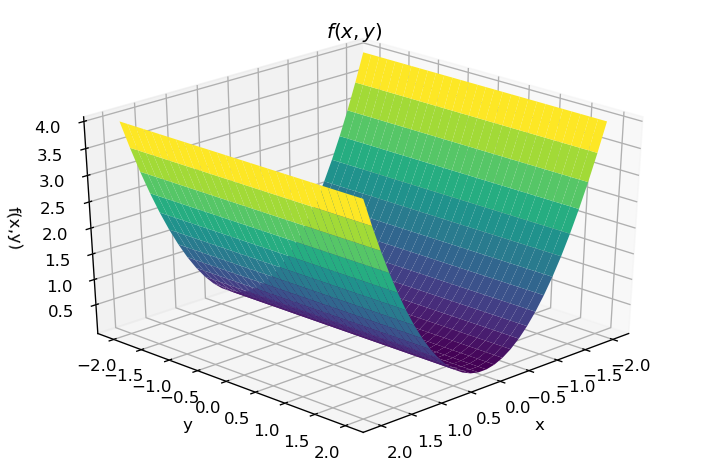

In [7]:
plot(r, title=r'$f(x,y)$', fun=fun)

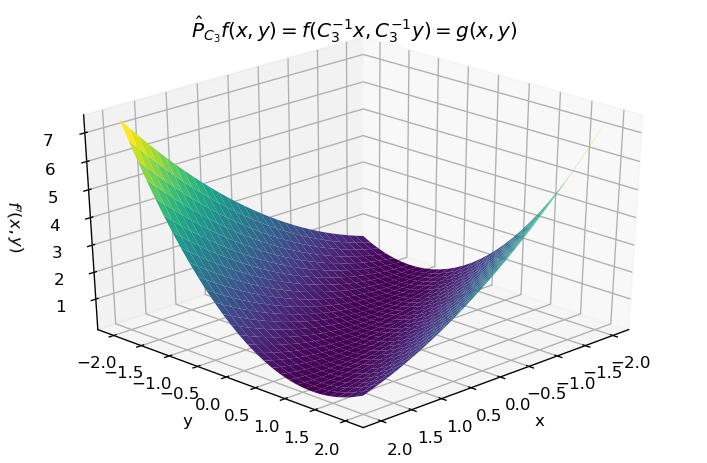

In [8]:
plot(
        r, 
        R = [C, n], 
        title=r"$\hat{P}_{C_%d}f(x,y) = f(C_%d^{-1}x,C_%d^{-1}y) = g(x,y)$" % (n, n, n), 
        fun=fun
    )
_ = plt.gca().set_zlabel(r"$f'(x, y)$")

## 3.2. Orbital $\psi_{2p_y}$ proyectado en 2D

El orbital $\psi_{p_y}(\vec{r})$ está definido por la siguiente ecuación:

$$\psi_{p_y}(\vec{r}) = \frac{1}{\sqrt{64\pi}} \left( \frac{Z}{ a_0} \right)^{3/2} \rho e^{-\rho/2} sen(\theta)cos(\varphi)$$

Donde $a_0$ es el radio de Bohr, $Z$, el número atómico y,

$$sen(\theta)cos(\varphi) = \frac{y}{r}$$ 
$$r = \sqrt{x^2 + y^2 + z^2}$$
$$\rho = \frac{Zr}{a_0}$$

In [9]:
N = 100
x = np.outer(np.linspace(-10, 10, N), np.ones(N))
y = x.copy().T # transpose
n = 3
r = [x, y]
fun = ψ_py
elevation = 90
azimut = 0

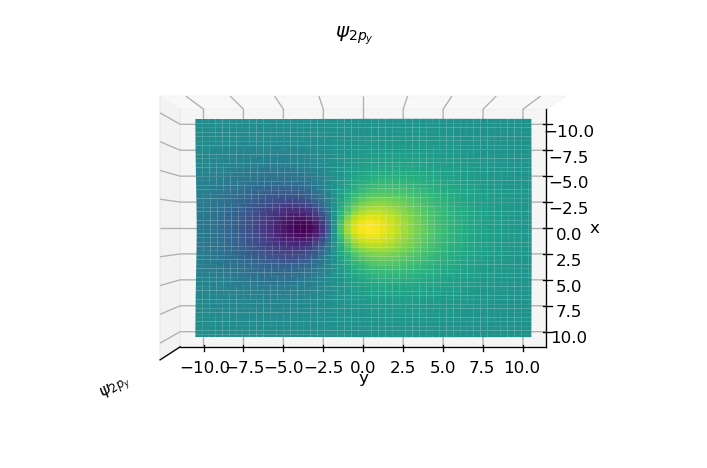

In [10]:
plot(
        r, 
        title=r'$\psi_{2p_y}$', 
        fun=fun,
        elevation=elevation,
        azimut=azimut
    )
plt.gca().set_zticks([])
_ = plt.gca().set_zlabel(r"$\psi_{2p_y}$")

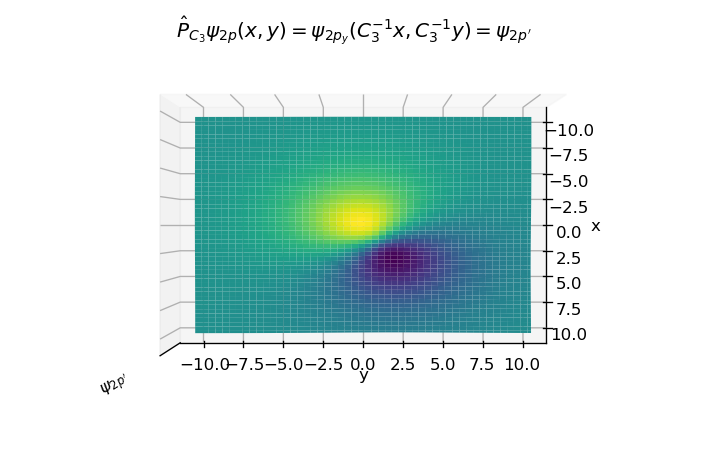

In [11]:
plot(
        r, 
        R = [C, n], 
        title=r"$\hat{P}_{C_%d}\psi_{2p}(x,y) = \psi_{2p_y}(C_%d^{-1}x,C_%d^{-1}y) = \psi_{2p'}$" % (n, n, n), 
        fun=fun,
        elevation=elevation,
        azimut=azimut
    )
plt.gca().set_zticks([])
_ = plt.gca().set_zlabel(r"$\psi_{2p'}$")

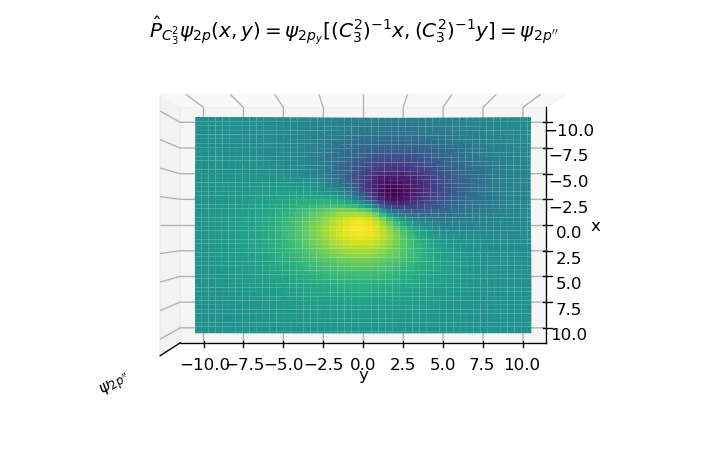

In [12]:
plot(
        r, 
        R = [C, n/2], 
        title=r"$\hat{P}_{C_3^2}\psi_{2p}(x,y) = \psi_{2p_y}[(C_3^2)^{-1}x,(C_3^2)^{-1}y] = \psi_{2p''}$", 
        fun=fun,
        elevation=elevation,
        azimut=azimut
    )
plt.gca().set_zticks([])
_ = plt.gca().set_zlabel(r"$\psi_{2p''}$")

End!